<a href="https://colab.research.google.com/github/fathanick/Fundamentals-of-Data-Science/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a simple code for decision tree algorithm using scikit learn, make dataset from playing tennis dataset, create the tree visualization and finally, make prediction based on the new data.

## Create the dataset

### Subtask:
Define the dataset based on the playing tennis dataset, including features and target variable.


**Reasoning**:
Create a pandas DataFrame with the playing tennis dataset, defining features and the target variable.



In [1]:
import pandas as pd

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
display(df)

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


## Prepare data for scikit-learn

### Subtask:
Convert the categorical features into numerical representations that scikit-learn can use.


**Reasoning**:
Convert the categorical features into numerical representations using LabelEncoder.



In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if column != 'PlayTennis':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

le_target = LabelEncoder()
df['PlayTennis_encoded'] = le_target.fit_transform(df['PlayTennis'])

display(df)

,Outlook,Temperature,Humidity,Windy,PlayTennis,PlayTennis_encoded
0,2,1,0,0,No,0
1,2,1,0,1,No,0
2,0,1,0,0,Yes,1
3,1,2,0,0,Yes,1
4,1,0,1,0,Yes,1
5,1,0,1,1,No,0
6,0,0,1,1,Yes,1
7,2,2,0,0,No,0
8,2,0,1,0,Yes,1
9,1,2,1,0,Yes,1


## Train the decision tree model

### Subtask:
Train the decision tree classifier on the prepared data.


**Reasoning**:
Separate features and target, then train the decision tree classifier.



In [3]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df['PlayTennis_encoded']

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

DecisionTreeClassifier()

## Visualize the decision tree

### Subtask:
Generate a visualization of the trained decision tree.


**Reasoning**:
Generate a visualization of the trained decision tree.



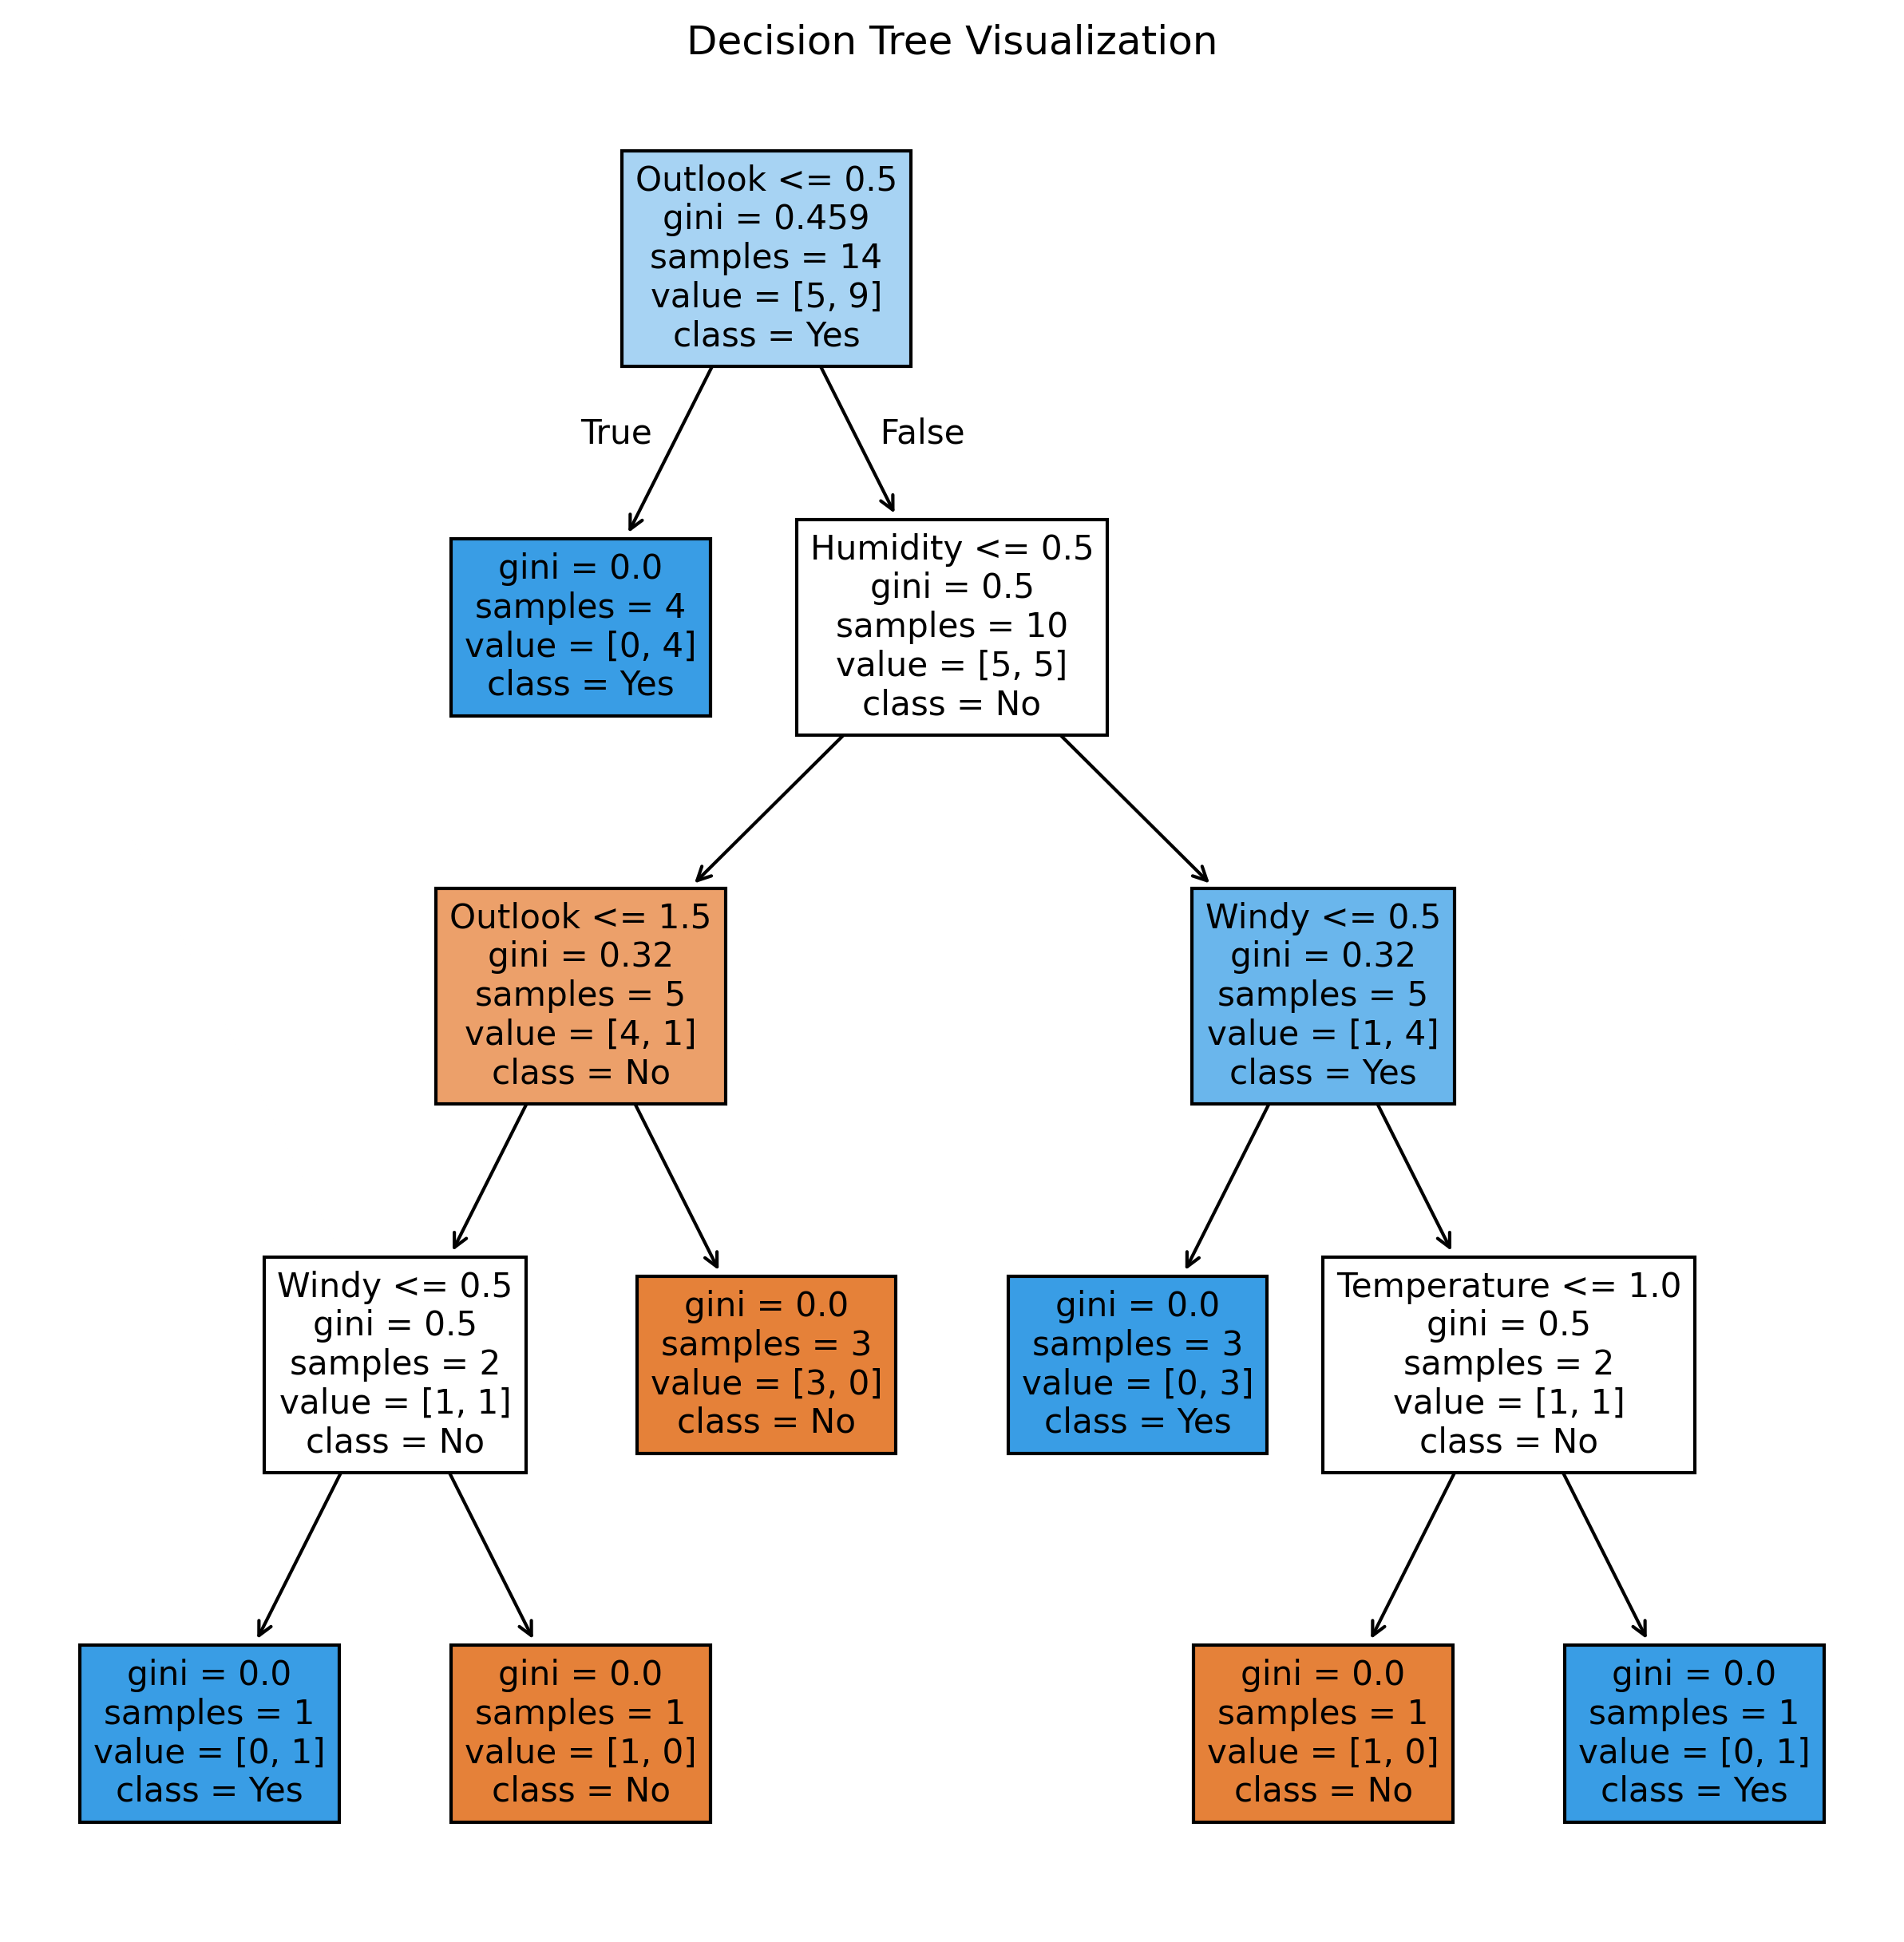

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
plot_tree(dt_classifier,
          feature_names = X.columns,
          class_names = df['PlayTennis'].unique(),
          filled = True)
plt.title('Decision Tree Visualization')
plt.show()

## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Create a new DataFrame for prediction with encoded values and use the trained model to predict the outcome.



In [5]:
new_data = {'Outlook': ['Sunny', 'Rainy'],
            'Temperature': ['Cool', 'Hot'],
            'Humidity': ['High', 'Normal'],
            'Windy': ['False', 'True']}

new_df = pd.DataFrame(new_data)

for column in new_df.columns:
    if column in label_encoders:
        new_df[column] = label_encoders[column].transform(new_df[column])

predictions = dt_classifier.predict(new_df)
print("Predictions for new data:", predictions)

Predictions for new data: [0 0]


## Summary:

### Data Analysis Key Findings

*   A pandas DataFrame was created to represent the playing tennis dataset, including features such as 'Outlook', 'Temperature', 'Humidity', and 'Windy', and the target variable 'PlayTennis'.
*   Categorical features and the target variable were successfully converted into numerical representations using `LabelEncoder` to prepare the data for scikit-learn.
*   A decision tree classifier was trained on the prepared numerical data.
*   A visualization of the trained decision tree was generated, displaying the tree structure with feature and class names.
*   The trained model was used to make predictions on new data points after applying the same encoding to the new data's categorical features. The predictions were 0 (No) and 0 (No) for the two new data points.

### Insights or Next Steps

*   The visualization of the decision tree provides a clear understanding of the decision rules learned by the model based on the input features.
*   The model is capable of making predictions on new, unseen data, demonstrating its usability for classification tasks.
